<a href="https://colab.research.google.com/github/harshii-02/DL-assignment/blob/main/deepreinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

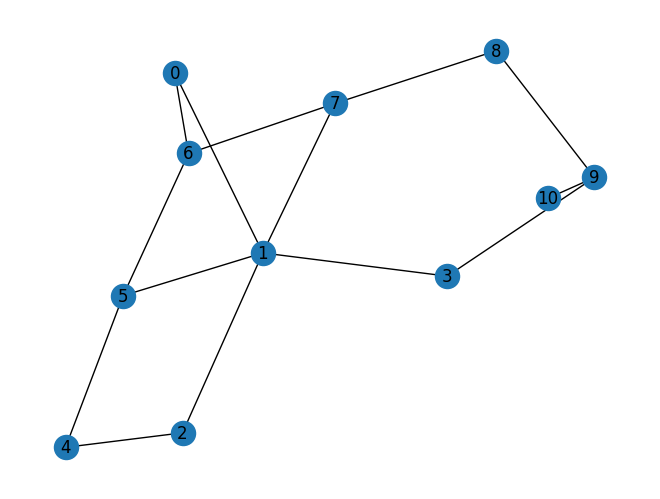

Most efficient path: [0, np.int64(1), np.int64(3), np.int64(9), np.int64(10)]


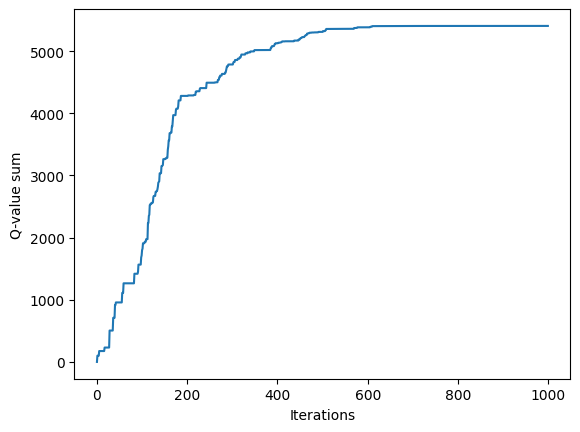

In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import random

# ---------------- Graph Definition ----------------
edges = [(0,1),(1,5),(5,6),(5,4),(1,2),(1,3),
         (9,10),(2,4),(0,6),(6,7),(8,9),
         (7,8),(1,7),(3,9)]

GOAL = 10
N_STATES = 11
GAMMA = 0.75
EPISODES = 1000

# ---------------- Graph Visualization ----------------
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

# ---------------- Reward Matrix ----------------
R = -np.ones((N_STATES, N_STATES))

for s, a in edges:
    R[s, a] = 100 if a == GOAL else 0
    R[a, s] = 100 if s == GOAL else 0

R[GOAL, GOAL] = 100

# ---------------- Q Matrix ----------------
Q = np.zeros((N_STATES, N_STATES))

# ---------------- Helper Functions ----------------
def available_actions(state):
    return np.where(R[state] >= 0)[0]

def choose_action(state):
    return random.choice(available_actions(state))

def update_q(state, action):
    Q[state, action] = R[state, action] + GAMMA * np.max(Q[action])

# ---------------- Training ----------------
scores = []
for _ in range(EPISODES):
    state = random.randint(0, N_STATES - 1)
    action = choose_action(state)
    update_q(state, action)
    scores.append(np.sum(Q))

# ---------------- Testing ----------------
state = 0
path = [state]

while state != GOAL:
    state = np.argmax(Q[state])
    path.append(state)

print("Most efficient path:", path)

# ---------------- Plot ----------------
plt.plot(scores)
plt.xlabel("Iterations")
plt.ylabel("Q-value sum")
plt.show()
